## ライブラリ読み込み

In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# from bs4 import BeautifulSoup
# import requests
# froma time import sleep

In [5]:
# サッカー試合結果まとめサイト
# 2012-2018までデータが存在
# url = 'http://www.football-lab.jp/ka-f/match/?year=2017'
# url = 'http://www.football-lab.jp/ka-f/match/'

# MongoDB テスト

In [2]:
from pymongo import MongoClient

In [3]:
# ローカルホストへの接続
client = MongoClient()

In [4]:
# testデータベースの取得
db = client.test

# データベースのsportsコレクションを取得
collection = db.sports

# ライブラリ読み込み

In [9]:
import scrapy
from scrapy.crawler import CrawlerProcess
from scrapy.utils.project import get_project_settings

# import time

# import requests
# import lxml.html
# from pymongo import MongoClient

# Spiderのテンプレート作成

In [13]:
# 以下をターミナルで実行
# scrapy genspider news news.yahoo.co.jp


In [17]:
class NewsSpider(scrapy.Spider):
    name = 'news'
    allowed_domains = ['news.yahoo.co.jp']
    start_urls = ['http://news.yahoo.co.jp/']

    def parse(self, response):
        pass


In [19]:

# process = CrawlerProcess(get_project_settings())

process.crawl('news')
process.start() 
# the script will block here until the crawling is finished


KeyError: 'Spider not found: news'

# 参考

# スクレイピングメイン処理

In [281]:
def main():
# MongoDBへの接続 
    client = MongoClient()
    collection = client.scraping.match
    
# DBの初期化
    collection.delete_many({})

# セッションの更新
    session = requests.Session()
    response = requests.get('http://soccer.from.tv/team')
    
# チームのURL一覧を取得
    urls = scrape_list_page(response)
    for url in urls:
        time.sleep(1) # 1秒ウェイト
        response = session.get(url)
    
# 年別のURL一覧を取得
        urls_team = scrape_list_year_page(response)
        for url_year in urls_team:
            time.sleep(1) # 1秒ウェイト
            print(url_year)
            response = session.get(url_year)
            match = scrape_detail_page(response)
            print(match)
            collection.insert_one(match)
        break #テスト用

# 一覧ページから詳細ページのURLを取得

In [46]:
def scrape_list_page(response):
    root = lxml.html.fromstring(response.content)
    root.make_links_absolute(response.url)
    
    for a in root.cssselect('#main-column > table a'):
        url = a.get('href')
        yield url
        

# 詳細ページから年別の詳細ページのURLを取得

In [225]:
def scrape_list_year_page(response):
    root = lxml.html.fromstring(response.content)
    root.make_links_absolute(response.url)
    
    for a in root.cssselect('#main-column table a[href*=y]'):
        url_year = a.get('href')
        yield url_year

# 詳細ページからデータを取得

In [278]:
def scrape_detail_page(response):
    root = lxml.html.fromstring(response.content)
    match = {
        'url': response.url, # URL
    }
    return match

# 実行

In [286]:
if __name__ == '__main__':
    main()

http://soccer.from.tv/team/276/y18/
{'url': 'http://soccer.from.tv/team/276/y18/'}
http://soccer.from.tv/team/276/y17/
{'url': 'http://soccer.from.tv/team/276/y17/'}
http://soccer.from.tv/team/276/y16/
{'url': 'http://soccer.from.tv/team/276/y16/'}
http://soccer.from.tv/team/276/y15/
{'url': 'http://soccer.from.tv/team/276/y15/'}
http://soccer.from.tv/team/276/y14/
{'url': 'http://soccer.from.tv/team/276/y14/'}
http://soccer.from.tv/team/276/y13/
{'url': 'http://soccer.from.tv/team/276/y13/'}
http://soccer.from.tv/team/276/y12/
{'url': 'http://soccer.from.tv/team/276/y12/'}
http://soccer.from.tv/team/276/y11/
{'url': 'http://soccer.from.tv/team/276/y11/'}
http://soccer.from.tv/team/276/y10/
{'url': 'http://soccer.from.tv/team/276/y10/'}
http://soccer.from.tv/team/276/y09/
{'url': 'http://soccer.from.tv/team/276/y09/'}
http://soccer.from.tv/team/276/y08/
{'url': 'http://soccer.from.tv/team/276/y08/'}
http://soccer.from.tv/team/276/y07/
{'url': 'http://soccer.from.tv/team/276/y07/'}
http

# 以下参考

In [287]:
# データの確認
db = collection.match
for data in collection.find():
    print(data)

{'_id': ObjectId('5ae85e72d084d83580ad3ec6'), 'url': 'http://soccer.from.tv/team/276/y18/'}
{'_id': ObjectId('5ae85e73d084d83580ad3ec7'), 'url': 'http://soccer.from.tv/team/276/y17/'}
{'_id': ObjectId('5ae85e75d084d83580ad3ec8'), 'url': 'http://soccer.from.tv/team/276/y16/'}
{'_id': ObjectId('5ae85e76d084d83580ad3ec9'), 'url': 'http://soccer.from.tv/team/276/y15/'}
{'_id': ObjectId('5ae85e77d084d83580ad3eca'), 'url': 'http://soccer.from.tv/team/276/y14/'}
{'_id': ObjectId('5ae85e78d084d83580ad3ecb'), 'url': 'http://soccer.from.tv/team/276/y13/'}
{'_id': ObjectId('5ae85e79d084d83580ad3ecc'), 'url': 'http://soccer.from.tv/team/276/y12/'}
{'_id': ObjectId('5ae85e7bd084d83580ad3ecd'), 'url': 'http://soccer.from.tv/team/276/y11/'}
{'_id': ObjectId('5ae85e7cd084d83580ad3ece'), 'url': 'http://soccer.from.tv/team/276/y10/'}
{'_id': ObjectId('5ae85e7dd084d83580ad3ecf'), 'url': 'http://soccer.from.tv/team/276/y09/'}
{'_id': ObjectId('5ae85e7ed084d83580ad3ed0'), 'url': 'http://soccer.from.tv/team

In [254]:
collection['match'].find()

In [139]:
session = requests.Session()
response = session.get('http://soccer.from.tv/team/276/')
scrape_list_year_page(response)
root = lxml.html.fromstring(response.content)

In [192]:
# root.cssselect('#main-column > table')[1].text_content()
root.cssselect('#main-column > table')[1]

<Element table at 0x18f0cc71e58>

In [210]:
root = lxml.html.fromstring(response.content)
root.make_links_absolute(response.url)
# root.cssselect('#main-column a')
for a in root.cssselect('#main-column table a[href*=y]'):
# for a in root.cssselect('a'):
        url_year = a.get('href')
        print(url_year)

http://soccer.from.tv/team/276/y18/
http://soccer.from.tv/team/276/y17/
http://soccer.from.tv/team/276/y16/
http://soccer.from.tv/team/276/y15/
http://soccer.from.tv/team/276/y14/
http://soccer.from.tv/team/276/y13/
http://soccer.from.tv/team/276/y12/
http://soccer.from.tv/team/276/y11/
http://soccer.from.tv/team/276/y10/
http://soccer.from.tv/team/276/y09/
http://soccer.from.tv/team/276/y08/
http://soccer.from.tv/team/276/y07/
http://soccer.from.tv/team/276/y06/
http://soccer.from.tv/team/276/y05/


In [258]:
def load_your_dic(collection_name):
#     db = get_db(collection)
    cursor = collection[collection_name].find()
    df = pd.DataFrame.from_dict(list(cursor)).astype(object)

    return df

In [284]:
pd.DataFrame.from_dict(list(collection.find())).astype(object)

,_id,url
0,5ae8497dd084d83580ad3eb6,http://soccer.from.tv/team/276/y18/
1,5ae8497ed084d83580ad3eb7,http://soccer.from.tv/team/276/y17/
2,5ae8497fd084d83580ad3eb8,http://soccer.from.tv/team/276/y16/
3,5ae84980d084d83580ad3eb9,http://soccer.from.tv/team/276/y15/
4,5ae84982d084d83580ad3eba,http://soccer.from.tv/team/276/y14/
5,5ae84983d084d83580ad3ebb,http://soccer.from.tv/team/276/y13/
6,5ae84984d084d83580ad3ebc,http://soccer.from.tv/team/276/y12/
7,5ae84985d084d83580ad3ebd,http://soccer.from.tv/team/276/y11/
8,5ae84986d084d83580ad3ebe,http://soccer.from.tv/team/276/y10/
9,5ae84987d084d83580ad3ebf,http://soccer.from.tv/team/276/y09/


In [267]:
for data in collection.find():
    print(url)

http://soccer.from.tv/team/827/
http://soccer.from.tv/team/827/
http://soccer.from.tv/team/827/
http://soccer.from.tv/team/827/
http://soccer.from.tv/team/827/
http://soccer.from.tv/team/827/
http://soccer.from.tv/team/827/
http://soccer.from.tv/team/827/
http://soccer.from.tv/team/827/
http://soccer.from.tv/team/827/
http://soccer.from.tv/team/827/
http://soccer.from.tv/team/827/
http://soccer.from.tv/team/827/
http://soccer.from.tv/team/827/


In [259]:
load_your_dic('match')

""


In [ ]:
#main-column > table > tbody > tr:nth-child(2) > td:nth-child(2) > span:nth-child(1) > a

In [239]:
client = MongoClient()
collection = client.scraping.match

In [89]:
# 空のDataFrameを作成
url = 'http://soccer.from.tv/team/276/y17/'
data = pd.io.html.read_html(url)[3]
df_raw = DataFrame(data)
df = pd.DataFrame(columns = df_raw.iloc[0,0:])
df['tm']=''


# 対戦結果データのスクレイピング
for obs_tm in tm_url_list: 
    for i_year in range(7):
#     for i_year in range(1):
        
        # 対戦情報を取得
        print(obs_tm)
        year = i_year+12
        url = 'http://soccer.from.tv/team/{}/y{}/'.format(obs_tm, year)
        print(url)

        # データの存在しないページは除外
        if len(pd.io.html.read_html(url)) == 8 :        
            data = pd.io.html.read_html(url)[3]
            df_raw = DataFrame(data)
            df2=df_raw.iloc[1:,0:]
            df2.columns = df_raw.iloc[0,0:]

            # 自チーム名を取得
            result = requests.get(url)
            c = result.content
            soup = BeautifulSoup(c, "html.parser")
            tm = soup.find("div", attrs={"class": "page_title"}).b.string
            df2['tm']=tm

            df = df.append(df2)
        
        #エラー対策に0.5秒時間を置く
        sleep(0.5)

276
http://soccer.from.tv/team/276/y12/
294
http://soccer.from.tv/team/294/y12/
176
http://soccer.from.tv/team/176/y12/
103
http://soccer.from.tv/team/103/y12/
121
http://soccer.from.tv/team/121/y12/
123
http://soccer.from.tv/team/123/y12/
532
http://soccer.from.tv/team/532/y12/
296
http://soccer.from.tv/team/296/y12/
528
http://soccer.from.tv/team/528/y12/
526
http://soccer.from.tv/team/526/y12/
126
http://soccer.from.tv/team/126/y12/
302
http://soccer.from.tv/team/302/y12/
134
http://soccer.from.tv/team/134/y12/
133
http://soccer.from.tv/team/133/y12/
314
http://soccer.from.tv/team/314/y12/
953
http://soccer.from.tv/team/953/y12/
536
http://soccer.from.tv/team/536/y12/
116
http://soccer.from.tv/team/116/y12/
148
http://soccer.from.tv/team/148/y12/
313
http://soccer.from.tv/team/313/y12/
531
http://soccer.from.tv/team/531/y12/
303
http://soccer.from.tv/team/303/y12/
238
http://soccer.from.tv/team/238/y12/
120
http://soccer.from.tv/team/120/y12/
122
http://soccer.from.tv/team/122/y12/


## データ読み込み

In [90]:
# backup
df_bk = df

In [114]:
# カラムの抽出
df = df[[
    '年月日', 
    '試合',
    '節/回戦',
    'H/A',
    'スコア',
    '相手',
    'SH',
    '被SH',
    '天候',
    '試合会場',
    'J公式',
    'tm'
]]

# 年月日がnullのデータを除外
df=df[df["年月日"].notnull()]

In [116]:
# 試合結果フラグを作成
df.loc[df['スコア'].str.contains('○'),'match_result'] = 'W'
df.loc[df['スコア'].str.contains('●'),'match_result'] = 'L'
df.loc[df['スコア'].str.contains('△'),'match_result'] = 'D'

# 勝敗文字を除外
df['スコア'] = df['スコア'].str.replace("○","")
df['スコア'] = df['スコア'].str.replace("●","")
df['スコア'] = df['スコア'].str.replace("△","")

# PKは引き分け扱い
df.loc[df['スコア'].str.contains('PK'),'match_result'] = 'D'
df['スコア'] = df['スコア'].str.split('PK').str[0]

# 得点を抽出
df['goals_for'] = df['スコア'].str.split(' - ').str[0]
df['goals_against'] = df['スコア'].str.split(' - ').str[1]

# 型変換
df['goals_for'] = df['goals_for'].astype(np.int64)
df['goals_against'] = df['goals_against'].astype(np.int64)

# 得失点差を計算
df['goals_difference'] = df['goals_for'] - df['goals_against']

In [118]:
# カラム名を英名に変更
df = df.rename(columns={
    '年月日':'dte', 
    '相手':'tm_opp',
    '節/回戦':'match_round',
    'H/A':'stadium_HA',
    'SH':'sh_for',
    '被SH':'sh_against',
    '試合':'match_type',
    '天候':'weather',
    '試合会場':'stadium'
})

# カラムの整理
df = df.loc[:,[
    'tm'
    ,'tm_opp'
    ,'match_type'
    ,'match_round'
    ,'stadium'
    ,'stadium_HA'
    ,'dte'
    ,'match_result'
    ,'goals_difference'
    ,'goals_for'
    ,'goals_against'
    ,'weather'
#     ,'goals_player'
    ,'sh_for'
    ,'sh_against'
]]

# インデックスのリセット
df.reset_index(drop=True, inplace=True)

In [121]:
# csvに吐き出し
df.to_csv('df_res.csv')

In [122]:
df

,tm,tm_opp,match_type,match_round,stadium,stadium_HA,dte,match_result,goals_difference,goals_for,goals_against,weather,sh_for,sh_against
0,札幌,新潟,J1,第34節,東北電ス,A,2012/12/01,L,-3,1,4,雨,6,18
1,札幌,横浜FM,J1,第33節,札幌ド,H,2012/11/24,L,-2,0,2,屋内,3,18
2,札幌,鳥栖,J1,第32節,札幌ド,H,2012/11/17,L,-1,2,3,屋内,11,17
3,札幌,広島,J1,第31節,広島ビ,A,2012/11/07,L,-3,0,3,晴,4,19
4,札幌,FC東京,J1,第30節,味スタ,A,2012/10/27,L,-5,0,5,晴,9,18
5,札幌,鹿島,J1,第29節,札幌厚別,H,2012/10/20,D,0,0,0,曇時々雨,5,17
6,札幌,浦和,J1,第28節,埼玉,A,2012/10/06,W,1,2,1,晴,9,17
7,札幌,川崎F,J1,第27節,等々力,A,2012/09/29,L,-1,0,1,晴,6,20
8,札幌,大宮,J1,第26節,札幌厚別,H,2012/09/22,L,-5,0,5,晴のち雨,3,17
9,札幌,柏,J1,第25節,柏,A,2012/09/15,L,-2,1,3,晴,9,23


## データ読み込み（csv）

In [6]:
df = pd.read_csv('df_res.csv',sep=',', encoding="SHIFT-JIS")

In [7]:
# check
df

,Unnamed: 0,tm,tm_opp,match_type,match_round,stadium,stadium_HA,dte,match_result,goals_difference,goals_for,goals_against,weather,sh_for,sh_against
0,0,札幌,新潟,J1,第34節,東北電ス,A,2012/12/01,L,-3,1,4,雨,6.0,18.0
1,1,札幌,横浜FM,J1,第33節,札幌ド,H,2012/11/24,L,-2,0,2,屋内,3.0,18.0
2,2,札幌,鳥栖,J1,第32節,札幌ド,H,2012/11/17,L,-1,2,3,屋内,11.0,17.0
3,3,札幌,広島,J1,第31節,広島ビ,A,2012/11/07,L,-3,0,3,晴,4.0,19.0
4,4,札幌,FC東京,J1,第30節,味スタ,A,2012/10/27,L,-5,0,5,晴,9.0,18.0
5,5,札幌,鹿島,J1,第29節,札幌厚別,H,2012/10/20,D,0,0,0,曇時々雨,5.0,17.0
6,6,札幌,浦和,J1,第28節,埼玉,A,2012/10/06,W,1,2,1,晴,9.0,17.0
7,7,札幌,川崎F,J1,第27節,等々力,A,2012/09/29,L,-1,0,1,晴,6.0,20.0
8,8,札幌,大宮,J1,第26節,札幌厚別,H,2012/09/22,L,-5,0,5,晴のち雨,3.0,17.0
9,9,札幌,柏,J1,第25節,柏,A,2012/09/15,L,-2,1,3,晴,9.0,23.0


# モデル構築

### 学習データ加工

In [44]:
# サンプリング
# df_s = df.sample(5000)
# df_s = df[df['tm']=='札幌']

In [55]:
# 各カラムのユニークカウント
df.nunique()

Unnamed: 0          14007
tm                     57
tm_opp                223
match_type             16
match_round           136
stadium               200
stadium_HA              2
dte                   834
match_result            3
goals_difference       20
goals_for              12
goals_against           9
weather                56
sh_for                 38
sh_against             33
dtype: int64

In [58]:
df['tm_opp'].value_counts()
# Jリーグ以外も入っている模様
# 対社会人チームとかもあるだろうし、Jリーグのチーム以外は除外でいいかも

df['match_type'].value_counts()
# Jリーグ以外も入っている模様。天皇杯とか
# Jリーグ以外は特徴量にはするものの、目的変数からは外す？

df['weather'].value_counts()
# 天候が細かい
# ほぼ晴れ、雨、曇、屋内なので丸める
# 曇りが含まれる場合は曇り
# 雨、雪が含まれる場合は雨


晴           6885
曇           3609
雨           1075
屋内           319
曇のち雨         316
晴のち曇         286
曇のち晴         253
雨のち曇         228
曇時々雨         225
晴時々曇         209
曇時々晴         158
曇一時雨         110
雨時々曇          50
晴のち雨          27
曇一時晴          20
晴一時雨          18
晴一時曇          12
雪             11
雨のち晴          11
晴時々雨          11
雨一時曇          10
晴のち曇一時雨        6
曇のち雨のち曇        6
晴時々曇一時雨        4
曇のち雪           4
雨時々晴           4
晴のち曇時々雨        4
曇時々雨のち晴        4
雨のち曇のち晴        4
雨のち曇一時雨        4
雪のち雨           4
雨のち曇のち雨        4
雨一時雷雨          4
雨のち曇時々晴        4
曇のち雷雨          3
晴時々雪           2
曇一時雨一時晴        2
曇のち霧           2
曇一時雷雨のち雨       2
曇一時雷雨のち曇       2
曇晴             2
曇時々晴一時雨        2
雨のち晴時々雨        2
曇のち雨のち晴        2
霧              2
晴一時雷雨のち曇       2
曇一時雨のち晴        2
晴一時雨のち曇        2
雨時々霧一時雷雨       2
晴のち雪           2
晴のち雪のち雨        2
曇時々晴のち雨        2
曇一時晴一時雨        2
雨のち晴のち雨        2
雨/曇            1
曇時々雪           1
Name: weather, dtype: int64

In [366]:
# backup
# df_s = df

# Jリーグの対象チームに絞る
list = df['tm'].unique()
df = df[df['tm_opp'].isin(list)]

# Jリーグに絞る
list = ['J1', 'J2', 'J3']
df = df[df['match_type'].isin(list)]

# 試合結果フラグを作成
df.loc[df['weather'].str.contains('晴'),'weath_simple'] = '晴'
df.loc[df['weather'].str.contains('曇'),'weath_simple'] = '曇'
df.loc[df['weather'].str.contains('雨'),'weath_simple'] = '雨'
df.loc[df['weather'].str.contains('雪'),'weath_simple'] = '雨'
df.loc[df['weather'].str.contains('霧'),'weath_simple'] = '雨'
df.loc[df['weather'].str.contains('屋内'),'weath_simple'] = '屋内'

# match_resultを加工
df.loc[df['match_result'].str.contains('W'),'target'] = '1'
df.loc[df['match_result'].str.contains('L'),'target'] = '0'
df.loc[df['match_result'].str.contains('D'),'target'] = '0'

# check
print(df['tm_opp'].unique())
print(df['match_type'].unique())
print(df['weath_simple'].unique())
print(df['stadium_HA'].unique())

['新潟' '横浜FM' '鳥栖' '広島' 'FC東京' '鹿島' '浦和' '川崎F' '大宮' '柏' '清水' 'G大阪' '神戸' '仙台'
 'C大阪' '名古屋' '磐田' '北九州' '岐阜' '千葉' '京都' '山形' '群馬' '熊本' '長崎' '栃木' '岡山' '水戸'
 '愛媛' '横浜FC' '富山' '鳥取' '松本' '東京V' '福岡' '徳島' '讃岐' '湘南' '大分' '金沢' '町田' '山口'
 '甲府' '札幌' '鹿児島' '盛岡' '琉球' '秋田' '福島' '藤枝' 'YS横浜' '相模原' '長野' '沼津' 'G大23'
 'C大23' 'F東23']
['J1' 'J2' 'J3']
['雨' '屋内' '晴' '曇']
['A' 'H']
A    5670
H    5670
Name: stadium_HA, dtype: int64


In [371]:
df.reset_index(inplace=True)

In [372]:
df

,index,Unnamed: 0,tm,tm_opp,match_type,match_round,stadium,stadium_HA,dte,match_result,goals_difference,goals_for,goals_against,weather,sh_for,sh_against,weath_simple,target
0,0,0,札幌,新潟,J1,第34節,東北電ス,A,2012/12/01,L,-3,1,4,雨,6.0,18.0,雨,0
1,1,1,札幌,横浜FM,J1,第33節,札幌ド,H,2012/11/24,L,-2,0,2,屋内,3.0,18.0,屋内,0
2,2,2,札幌,鳥栖,J1,第32節,札幌ド,H,2012/11/17,L,-1,2,3,屋内,11.0,17.0,屋内,0
3,3,3,札幌,広島,J1,第31節,広島ビ,A,2012/11/07,L,-3,0,3,晴,4.0,19.0,晴,0
4,4,4,札幌,FC東京,J1,第30節,味スタ,A,2012/10/27,L,-5,0,5,晴,9.0,18.0,晴,0
5,5,5,札幌,鹿島,J1,第29節,札幌厚別,H,2012/10/20,D,0,0,0,曇時々雨,5.0,17.0,雨,0
6,6,6,札幌,浦和,J1,第28節,埼玉,A,2012/10/06,W,1,2,1,晴,9.0,17.0,晴,1
7,7,7,札幌,川崎F,J1,第27節,等々力,A,2012/09/29,L,-1,0,1,晴,6.0,20.0,晴,0
8,8,8,札幌,大宮,J1,第26節,札幌厚別,H,2012/09/22,L,-5,0,5,晴のち雨,3.0,17.0,雨,0
9,9,9,札幌,柏,J1,第25節,柏,A,2012/09/15,L,-2,1,3,晴,9.0,23.0,晴,0


In [4]:
# フォントの設定
# plt.rcParams['font.family'] = 'IPAPGothic'

### モデリング

In [415]:
# import xgboost as xgb
# 改めて

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve

In [404]:
X = df.loc[:, ['tm', 'tm_opp', 'weath_simple','stadium_HA']]
y = df['target']

X = pd.get_dummies(X, columns = ['weath_simple'])
X = pd.get_dummies(X, columns = ['tm'])
X = pd.get_dummies(X, columns = ['tm_opp'])
# X = pd.get_dummies(X, columns = ['match_type'])
X = pd.get_dummies(X, columns = ['stadium_HA'])



In [439]:
# 学習データとテストデータの分離
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# ランダムフォレストの作成
forest = RandomForestClassifier(min_samples_leaf=3, random_state=0)
forest.fit(X_train, y_train)

# 評価
print('Train score: {}'.format(forest.score(X_train, y_train)))
print('Test score: {}'.format(forest.score(X_test, y_test)))
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, forest.predict(X_test))))
# print('f1 score: {:.3f}'.format(f1_score(y_test, forest.predict(X_test))))

prob = forest.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, prob, pos_label='0')
area = auc(recall, precision)

Train score: 0.6893592004703116
Test score: 0.6320987654320988
Confusion matrix:
[[1574  224]
 [ 819  218]]


In [440]:
area

0.56885054524718559

In [430]:
prob[:,1]

array([ 0.25861109,  0.42668876,  0.66182913, ...,  0.33669018,
        0.13804451,  0.27818765])

In [426]:
y_test

125      1
6285     1
3679     1
2238     1
3039     0
6381     1
5231     0
1334     0
4128     0
9597     0
9556     1
6917     0
7643     0
6043     0
10777    1
10576    1
9628     0
7115     0
9869     0
4162     1
9951     1
6060     0
654      0
10927    0
7154     0
3348     1
6057     0
2746     0
5160     0
1035     1
        ..
8436     1
143      0
10500    0
9532     0
3538     1
6022     1
3048     0
1282     0
1195     0
3099     1
7572     1
10574    0
4297     0
1285     0
4634     0
3814     1
7928     0
380      0
8796     0
7360     1
7157     0
6847     0
3081     0
3009     1
935      1
9334     1
2434     1
1804     0
8649     0
10550    0
Name: target, Length: 2835, dtype: object

In [406]:
y_pred_proba = DataFrame(forest.predict_proba(X))
df_pred = pd.concat([df, y_pred_proba],axis=1)

In [407]:
df_pred

,index,Unnamed: 0,tm,tm_opp,match_type,match_round,stadium,stadium_HA,dte,match_result,goals_difference,goals_for,goals_against,weather,sh_for,sh_against,weath_simple,target,0,1
0,0,0,札幌,新潟,J1,第34節,東北電ス,A,2012/12/01,L,-3,1,4,雨,6.0,18.0,雨,0,0.533084,0.466916
1,1,1,札幌,横浜FM,J1,第33節,札幌ド,H,2012/11/24,L,-2,0,2,屋内,3.0,18.0,屋内,0,0.675360,0.324640
2,2,2,札幌,鳥栖,J1,第32節,札幌ド,H,2012/11/17,L,-1,2,3,屋内,11.0,17.0,屋内,0,0.589968,0.410032
3,3,3,札幌,広島,J1,第31節,広島ビ,A,2012/11/07,L,-3,0,3,晴,4.0,19.0,晴,0,0.795579,0.204421
4,4,4,札幌,FC東京,J1,第30節,味スタ,A,2012/10/27,L,-5,0,5,晴,9.0,18.0,晴,0,0.799749,0.200251
5,5,5,札幌,鹿島,J1,第29節,札幌厚別,H,2012/10/20,D,0,0,0,曇時々雨,5.0,17.0,雨,0,0.722103,0.277897
6,6,6,札幌,浦和,J1,第28節,埼玉,A,2012/10/06,W,1,2,1,晴,9.0,17.0,晴,1,0.790568,0.209432
7,7,7,札幌,川崎F,J1,第27節,等々力,A,2012/09/29,L,-1,0,1,晴,6.0,20.0,晴,0,0.822410,0.177590
8,8,8,札幌,大宮,J1,第26節,札幌厚別,H,2012/09/22,L,-5,0,5,晴のち雨,3.0,17.0,雨,0,0.550670,0.449330
9,9,9,札幌,柏,J1,第25節,柏,A,2012/09/15,L,-2,1,3,晴,9.0,23.0,晴,0,0.781287,0.218713


In [408]:
# X
# 11340

# y_pred_proba
#11340

df_pred

,index,Unnamed: 0,tm,tm_opp,match_type,match_round,stadium,stadium_HA,dte,match_result,goals_difference,goals_for,goals_against,weather,sh_for,sh_against,weath_simple,target,0,1
0,0,0,札幌,新潟,J1,第34節,東北電ス,A,2012/12/01,L,-3,1,4,雨,6.0,18.0,雨,0,0.533084,0.466916
1,1,1,札幌,横浜FM,J1,第33節,札幌ド,H,2012/11/24,L,-2,0,2,屋内,3.0,18.0,屋内,0,0.675360,0.324640
2,2,2,札幌,鳥栖,J1,第32節,札幌ド,H,2012/11/17,L,-1,2,3,屋内,11.0,17.0,屋内,0,0.589968,0.410032
3,3,3,札幌,広島,J1,第31節,広島ビ,A,2012/11/07,L,-3,0,3,晴,4.0,19.0,晴,0,0.795579,0.204421
4,4,4,札幌,FC東京,J1,第30節,味スタ,A,2012/10/27,L,-5,0,5,晴,9.0,18.0,晴,0,0.799749,0.200251
5,5,5,札幌,鹿島,J1,第29節,札幌厚別,H,2012/10/20,D,0,0,0,曇時々雨,5.0,17.0,雨,0,0.722103,0.277897
6,6,6,札幌,浦和,J1,第28節,埼玉,A,2012/10/06,W,1,2,1,晴,9.0,17.0,晴,1,0.790568,0.209432
7,7,7,札幌,川崎F,J1,第27節,等々力,A,2012/09/29,L,-1,0,1,晴,6.0,20.0,晴,0,0.822410,0.177590
8,8,8,札幌,大宮,J1,第26節,札幌厚別,H,2012/09/22,L,-5,0,5,晴のち雨,3.0,17.0,雨,0,0.550670,0.449330
9,9,9,札幌,柏,J1,第25節,柏,A,2012/09/15,L,-2,1,3,晴,9.0,23.0,晴,0,0.781287,0.218713


In [403]:
# csvに吐き出し
df_pred.to_csv('df_pred.csv')

# 可視化

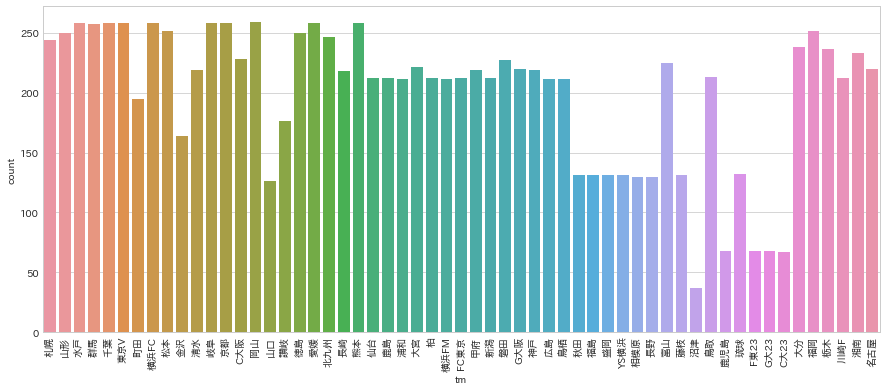

In [187]:
# チーム毎の試合数
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
ax = sns.countplot(x='tm',data=df)

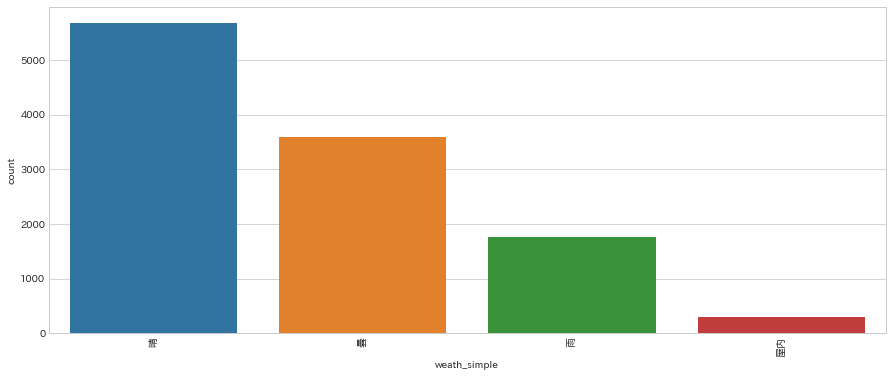

In [191]:
# 天候の種類数
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
ax = sns.countplot(x='weath_simple',
                   data=df, 
                   order=DataFrame(df.weath_simple.value_counts()).index)
     

In [289]:
sns.countplot(x='goals_difference', data=df, hue = 'stadium_HA')

NameError: name 'df' is not defined

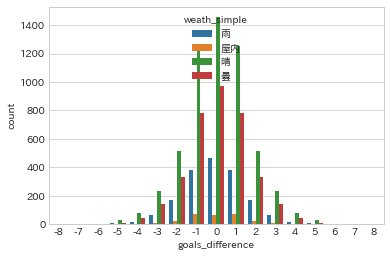

In [193]:
sns.countplot(x='goals_difference', data=df, hue = 'weath_simple')